In [83]:
import pandas as pd
import tensorflow
from tensorflow.keras import Sequential  # type: ignore
from tensorflow.keras.layers import Dense,Input # type: ignore
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [84]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
dataset.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [86]:
#used one hot encoding for encoding categorical data
dataset = pd.get_dummies(dataset, columns=["Geography", "Gender"], drop_first=True)

In [87]:
x=dataset.drop(columns=["Exited"])
y=dataset["Exited"]

In [88]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
model=Sequential([
    Input(shape=(11,)),             #input layer(11 features)
    Dense(11,activation="relu"),    #hidden layer 1
    Dense(11,activation="relu"),    #hidden layer 2
    Dense(1,activation="sigmoid")   #ouput layer
]) 

In [94]:
model.summary() #will give us the overview about our neural network

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [96]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.5665 - val_accuracy: 0.7987 - val_loss: 0.5089
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4884 - val_accuracy: 0.8087 - val_loss: 0.4562
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4481 - val_accuracy: 0.8194 - val_loss: 0.4292
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.4248 - val_accuracy: 0.8206 - val_loss: 0.4163
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.4107 - val_accuracy: 0.8275 - val_loss: 0.4074
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4007 - val_accuracy: 0.8244 - val_loss: 0.4010
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.3924 - val_accuracy: 0.8275 - val_loss: 0.3948
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.3839 - val_accu

In [97]:
model.layers[0].get_weights() # weights and biases for 1st layer

[array([[ 0.04116514, -0.12824652,  0.45512033, -0.21897131, -0.09019508,
          0.44672546,  0.22824003, -0.08979427, -0.01554614,  0.32527384,
          0.14270912],
        [ 0.56316495, -0.51624024, -0.70972836,  0.38917816, -0.17665955,
         -0.47131145, -0.3011287 ,  1.0024426 ,  0.42141974,  0.7239887 ,
          0.12386744],
        [-0.09432571, -0.23733462,  0.05320916, -0.00934106, -0.26914883,
          0.09156064,  0.01950011, -0.08291636, -0.08777236, -0.1104857 ,
          0.29952735],
        [ 0.03743517, -0.48478952, -0.4450988 , -0.7546582 , -0.93791735,
          0.04121731,  0.2274213 , -0.14894082, -0.7388142 ,  0.23584628,
         -0.69927263],
        [-0.85437953,  0.32864797, -0.00364744, -0.4146781 , -0.33116937,
         -0.04406208,  0.18520205,  1.343091  , -0.9377312 , -0.6088511 ,
          0.28306666],
        [-0.05661065,  0.09942901,  0.32072982, -0.03213645, -0.34268272,
         -0.39390022,  0.02793057, -0.05515727, -0.09314293,  0.0731499

In [98]:
model.layers[1].get_weights() #weights and biases for 2nd layer

[array([[-1.56996489e-01,  5.37640929e-01, -3.30909520e-01,
         -1.43929020e-01, -2.77355015e-01, -2.39543796e-01,
          4.90489691e-01,  2.96224654e-01, -1.65089995e-01,
          1.25131235e-01,  8.26908424e-02],
        [ 2.17205748e-01,  4.50161457e-01, -2.25901097e-01,
          2.29159251e-01,  1.28128201e-01,  6.30589426e-01,
          7.38456771e-02, -6.95274651e-01,  8.88639212e-01,
          2.78253585e-01,  5.20012993e-03],
        [-5.38592398e-01,  4.43879813e-01, -2.13739491e+00,
         -4.45363760e-01, -6.71706721e-02,  2.96057671e-01,
         -3.19037706e-01, -8.11973691e-01,  2.58209735e-01,
         -1.70588776e-01,  4.10245687e-01],
        [ 1.00480430e-02,  2.21022233e-01, -1.45629168e+00,
          2.97544032e-01,  2.25498341e-03, -1.17797112e+00,
          1.76616963e-02, -2.65679777e-01, -1.69667616e-01,
          5.77164233e-01,  3.21828425e-01],
        [ 5.93221784e-01,  2.73232579e-01, -9.80516523e-02,
         -1.51626885e-01,  5.53320825e-01,  

In [99]:
y_log=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [100]:
y_pred=np.where(y_log>=0.5,1,0)

In [101]:
accuracy_score(y_test,y_pred)

0.858

In [102]:
history.history  #shows all the loss accuracy for both training and validation

{'accuracy': [0.7828124761581421,
  0.796093761920929,
  0.807812511920929,
  0.8181250095367432,
  0.8235937356948853,
  0.8245312571525574,
  0.8248437643051147,
  0.8309375047683716,
  0.8424999713897705,
  0.8495312333106995,
  0.8526562452316284,
  0.8542187213897705,
  0.8579687476158142,
  0.8584374785423279,
  0.8596875071525574,
  0.8607812523841858,
  0.8595312237739563,
  0.8614062666893005,
  0.8620312213897705,
  0.8604687452316284,
  0.8606250286102295,
  0.8634374737739563,
  0.8612499833106995,
  0.8651562333106995,
  0.8634374737739563,
  0.8646875023841858,
  0.8628125190734863,
  0.8651562333106995,
  0.8645312786102295,
  0.8629687428474426,
  0.8639062643051147,
  0.8651562333106995,
  0.8631250262260437,
  0.8635937571525574,
  0.8645312786102295,
  0.864062488079071,
  0.866406261920929,
  0.8620312213897705,
  0.864062488079071,
  0.8631250262260437,
  0.8653125166893005,
  0.8643749952316284,
  0.8651562333106995,
  0.8646875023841858,
  0.8650000095367432,
  0

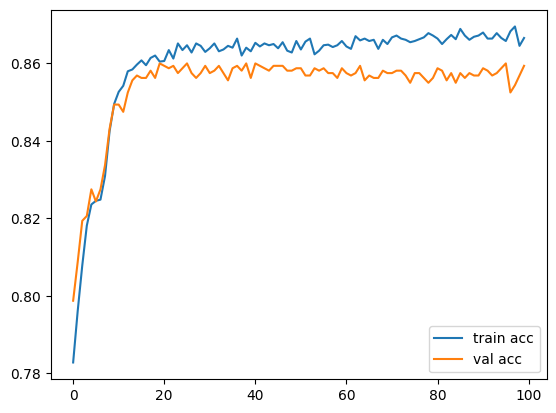

In [103]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

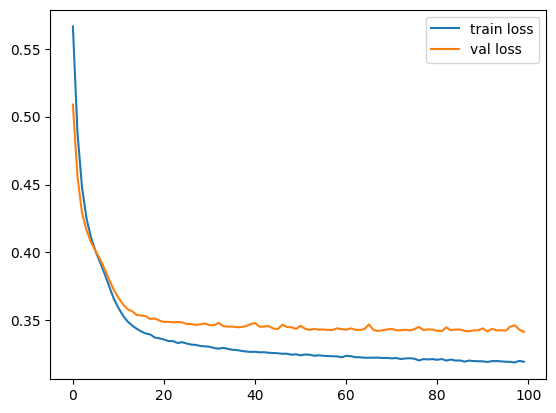

In [104]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show